# Step 2: Data Processing and Modeling <a id="step-2"></a>

---

** Table of content


## 1. Data Processing<a id="data-processing"></a>

### 1.1. Imports and environment setup<a id="imports"></a>

In [1]:
# Imports and environment setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split, KFold, cross_val_predict, GridSearchCV
from sklearn.metrics import (
    accuracy_score, 
    roc_auc_score, 
    f1_score, 
    precision_score, 
    recall_score, 
    confusion_matrix, 
    classification_report, 
    make_scorer
)
from sklearn.preprocessing import StandardScaler, RobustScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline


plt.style.use('ggplot')

# Load datasets
df_train = pd.read_csv("../data/data_train.csv")  # Train dataset

df_test = pd.read_csv("../data/data_test.csv")    # Test dataset

df_predictions = pd.read_csv("../data/data_predictions.csv", encoding="utf-8")

### 1.2. Data Preprocessing <a id="data-preprocessing"></a>

This is a summarize of what we have done in the EDA

In [2]:


# Remove duplications (if exist)
df_train.drop_duplicates(inplace=True)
df_test.drop_duplicates(inplace=True)

# Dropping unused columns
unused_columns = ['Id', 'AnyHealthcare', 'NoDocbcCost', 'Education']
df_train.drop(columns=unused_columns, inplace=True)  # Unused col
df_test.drop(columns=unused_columns, inplace=True)    # Unused col

# Engineering Feature
df_train['BP_Chol_Interaction'] = df_train['HighBP'] * df_train['HighChol']
df_train.drop(columns=['HighBP', 'HighChol'], inplace=True)

df_test['BP_Chol_Interaction'] = df_test['HighBP'] * df_test['HighChol']
df_test.drop(columns=['HighBP', 'HighChol'], inplace=True)

# Remove duplications (if exist)
df_train.drop_duplicates(inplace=True)
df_test.drop_duplicates(inplace=True)

# Handling missing values
df_train.replace([np.inf, -np.inf], np.nan, inplace=True) # Convert any infinite value into NaN
df_test.replace([np.inf, -np.inf], np.nan, inplace=True) # Convert any infinite value into NaN
df_train.fillna(df_train.median(), inplace=True)  # Impute with median for simplicity
df_test.fillna(df_test.median(), inplace=True)

# Convert categorical feature into category data type

categorical_features = [
    'BP_Chol_Interaction', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
    'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 
    'DiffWalk', 'Sex', 'Age', 'Income'
]

for column in categorical_features:
    df_train[column] = df_train[column].astype('category')
    df_test[column] = df_test[column].astype('category')


### 1.3. Test the data after cleaning <a id="cleaning-test"></a>

**Train Dataset**

In [3]:
print(f"{'Shape:'}{df_train.shape}")
print(f"\n{'Duplicated entries:'} {df_train.duplicated().sum()}")
print(f"\n{'COLUMNS OVERVIEW'}")
print(df_train.info())

Shape:(202335, 20)

Duplicated entries: 0

COLUMNS OVERVIEW
<class 'pandas.core.frame.DataFrame'>
Index: 202335 entries, 0 to 202943
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   CholCheck             202335 non-null  int64   
 1   BMI                   202335 non-null  int64   
 2   Smoker                202335 non-null  category
 3   Stroke                202335 non-null  category
 4   HeartDiseaseorAttack  202335 non-null  category
 5   PhysActivity          202335 non-null  category
 6   Fruits                202335 non-null  category
 7   Veggies               202335 non-null  category
 8   HvyAlcoholConsump     202335 non-null  category
 9   GenHlth               202335 non-null  int64   
 10  MentHlth              202335 non-null  int64   
 11  PhysHlth              202335 non-null  int64   
 12  DiffWalk              202335 non-null  category
 13  Sex                   202335 non-n

In [4]:
print(f"\n{'Number of null values in train dataset'}\n{df_train.isna().sum()}")


Number of null values in train dataset
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Income                  0
ExtraMedTest            0
ExtraAlcoholTest        0
Status                  0
BP_Chol_Interaction     0
dtype: int64


**Test Dataset**

In [5]:
print(f"{'Shape:'}{df_test.shape}")
print(f"\n{'Duplicated entries:'} {df_test.duplicated().sum()}")
print(f"\n{'COLUMNS OVERVIEW'}")
print(df_test.info())

Shape:(50696, 20)

Duplicated entries: 0

COLUMNS OVERVIEW
<class 'pandas.core.frame.DataFrame'>
Index: 50696 entries, 0 to 50735
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   CholCheck             50696 non-null  int64   
 1   BMI                   50696 non-null  int64   
 2   Smoker                50696 non-null  category
 3   Stroke                50696 non-null  category
 4   HeartDiseaseorAttack  50696 non-null  category
 5   PhysActivity          50696 non-null  category
 6   Fruits                50696 non-null  category
 7   Veggies               50696 non-null  category
 8   HvyAlcoholConsump     50696 non-null  category
 9   GenHlth               50696 non-null  int64   
 10  MentHlth              50696 non-null  int64   
 11  PhysHlth              50696 non-null  int64   
 12  DiffWalk              50696 non-null  category
 13  Sex                   50696 non-null  category
 14  

In [6]:
print(f"\n{'Number of null values in test dataset'}\n{df_test.isna().sum()}")


Number of null values in test dataset
CholCheck                   0
BMI                         0
Smoker                      0
Stroke                      0
HeartDiseaseorAttack        0
PhysActivity                0
Fruits                      0
Veggies                     0
HvyAlcoholConsump           0
GenHlth                     0
MentHlth                    0
PhysHlth                    0
DiffWalk                    0
Sex                         0
Age                         0
Income                      0
ExtraMedTest                0
ExtraAlcoholTest            0
Status                  50696
BP_Chol_Interaction         0
dtype: int64


### 1.4. Define features and target <a id="define-features"></a>

In [7]:
df_X = df_train.drop(['Status'], axis=1)  # Include all other columns as features
df_Y = df_train['Status']

print(df_X.shape)
print(df_Y.shape)


(202335, 19)
(202335,)


## 2. Data Processing <a id="data-processing-content"></a>

### 2.1. Visualize the data before process data <a id="visualize-before-process"></a>

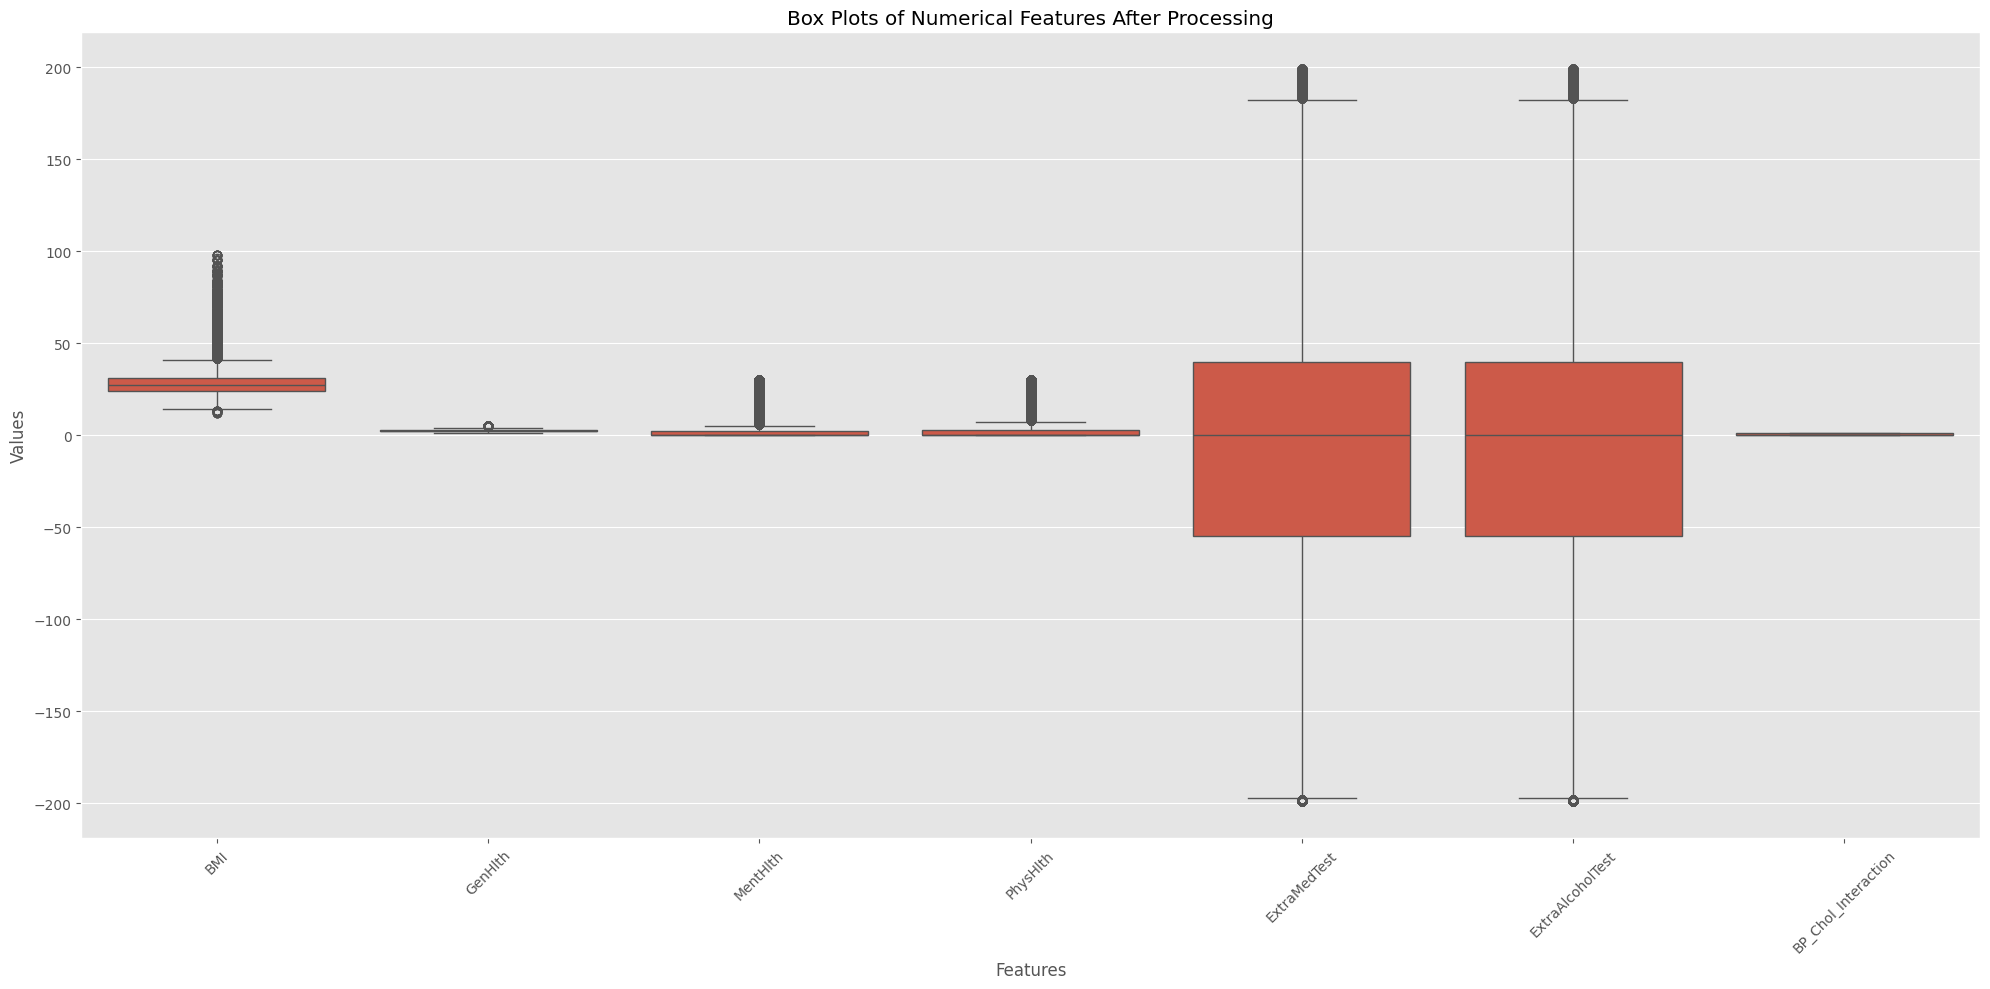

In [8]:
exclude_from_hist = ['Status', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
                     'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
                     'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

plt.figure(figsize=(20, 10))

# Filter and melt the DataFrame
melted_df = pd.melt(df_X, value_vars=[col for col in df_X.columns if col not in exclude_from_hist])

# Create the boxplot
sns.boxplot(x='variable', y='value', data=melted_df)
plt.xticks(rotation=45)
plt.title('Box Plots of Numerical Features After Processing')
plt.xlabel('Features')
plt.ylabel('Values')
plt.tight_layout()
plt.show()

### 2.2. Data Transformation <a id="data-transformation"></a>

In [9]:
## Normalize/Standarize numerical feature

scaler = StandardScaler()
numerical_features = ['BMI', 'MentHlth', 'PhysHlth', 'GenHlth', 'ExtraMedTest', 'ExtraAlcoholTest']

scaler.fit(df_X[numerical_features])  # Fit on training data

df_X[numerical_features] = scaler.transform(df_X[numerical_features]) # Transform both training datasets
df_test[numerical_features] = scaler.transform(df_test[numerical_features]) # Transform both test datasets



### 2.3. Handling Outliers<a id="outliers"></a>

Using winsorize 90% on my dataset, which mean 5% from the top and 5% from the bottom

In [10]:
# Outliers 
from scipy.stats.mstats import winsorize

# Function to winsorize outliers
def winsorize_column(column, alpha=0.05):
    lower_bound = column.quantile(alpha/2)
    upper_bound = column.quantile(1 - alpha/2)
    return column.clip(lower=lower_bound, upper=upper_bound)

# Apply winsorization to each numerical column
for column in numerical_features:
    df_X[column] = winsorize_column(df_X[column])


### 2.4. Revisualize the data after handling outliers <a id="visualize-after-process"></a>


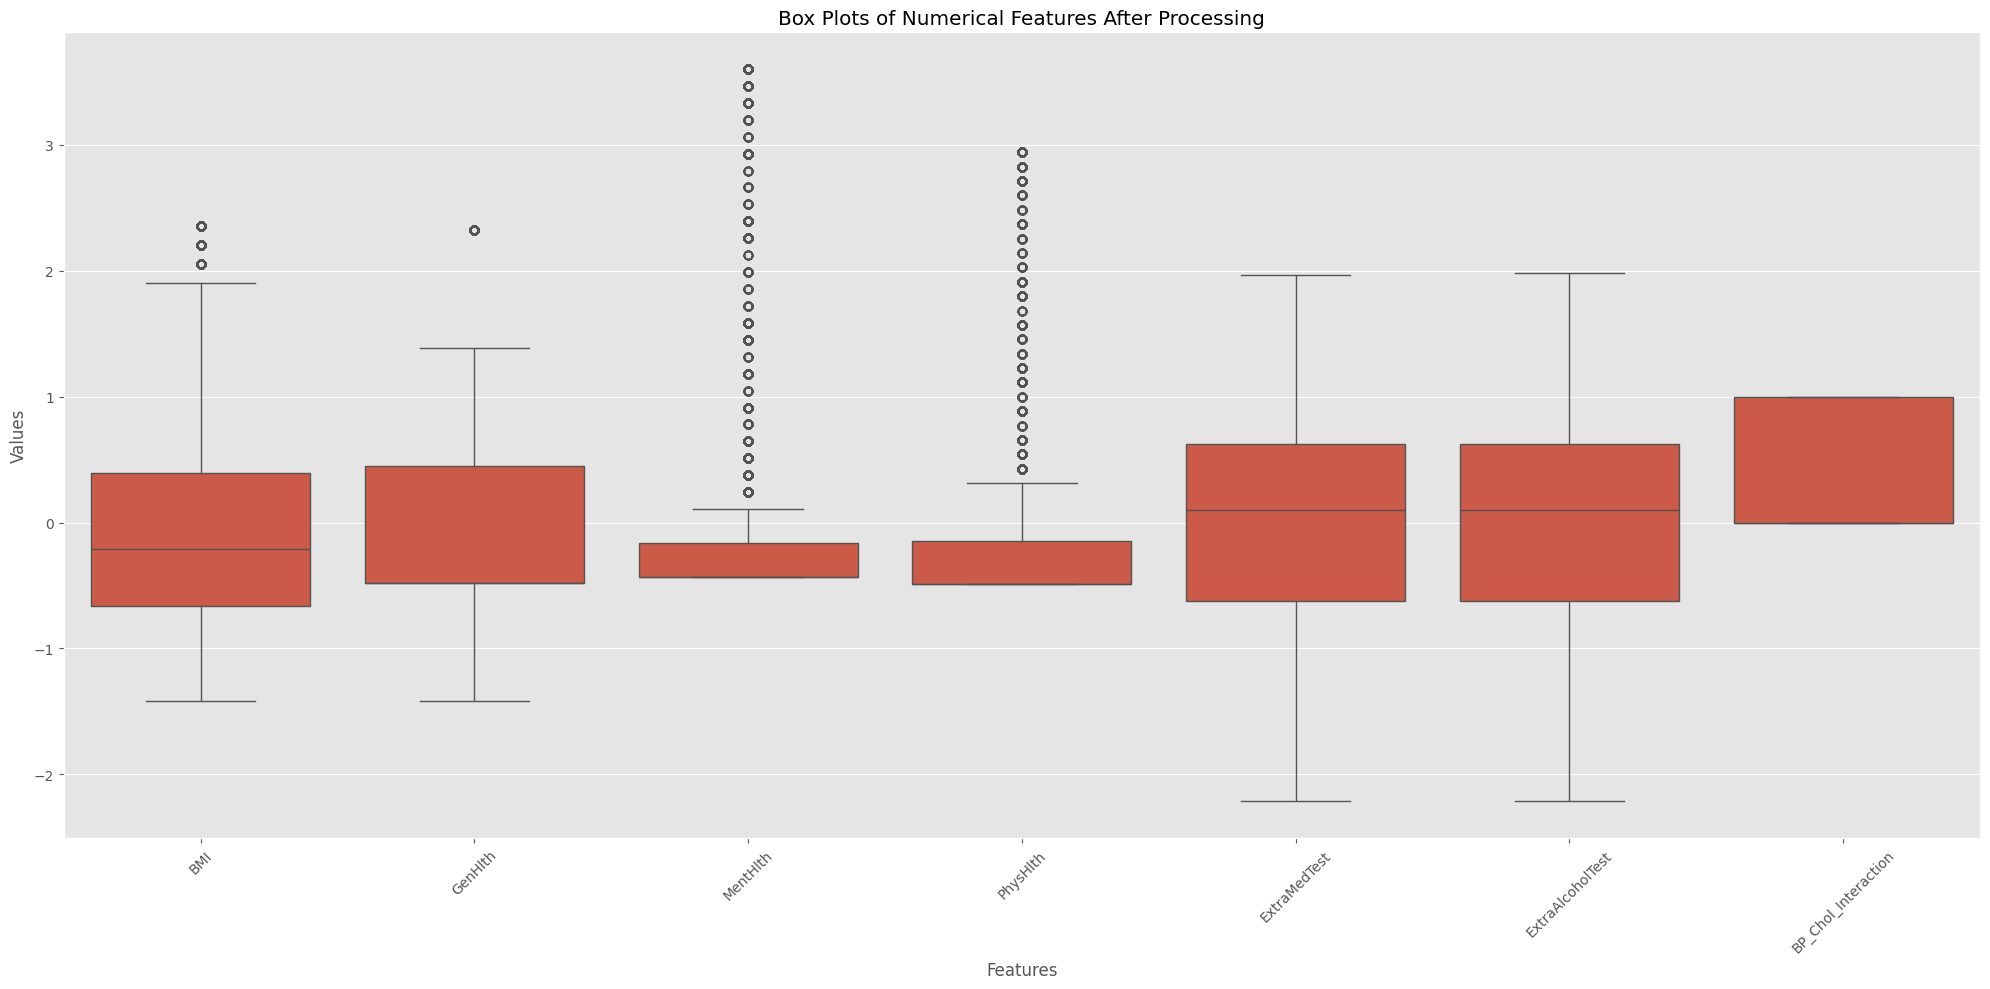

In [11]:
plt.figure(figsize=(20, 10))

# Filter and melt the DataFrame
melted_df = pd.melt(df_X, value_vars=[col for col in df_X.columns if col not in exclude_from_hist])

# Create the boxplot
sns.boxplot(x='variable', y='value', data=melted_df)
plt.xticks(rotation=45)
plt.title('Box Plots of Numerical Features After Processing')
plt.xlabel('Features')
plt.ylabel('Values')
plt.tight_layout()
plt.show()

As seen from the boxplot, the application of preprocessing techniques has significantly improved the structure of our dataset, ensuring that it is suitable for the development of predictive models. The following points highlight the successful transformation:
- **Normalization/Standardization**: Post-transformation, the numerical features exhibit a consistent scale across the board, as evidenced by the narrower interquartile ranges and the centralization of medians in the box plots. This uniformity is crucial for algorithms that are sensitive to the scale of the data.
- **Outlier Management**: Prior to preprocessing, the box plots displayed a considerable number of outliers, which could have skewed our models. The transformed data still shows outliers, but they are fewer and less extreme, indicating that our outlier management strategy has been effective.
- **Feature Distributions**: The scales of the features after transformation are well-aligned, falling within a much more constrained range. This is particularly important for distance-based algorithms and helps to prevent features with larger scales from dominating the learning process.
- **Readiness for Modeling**: With features now on a comparable scale, the dataset is primed for various machine learning techniques, which should yield more reliable and interpretable results.
s.

# 3. Modeling <a id="modeling"></a>

-------

## 3.1. Spliting training dataset and setting up K-Fold cross-validation

In [12]:

# Splitting data into train set and test set

train_X, val_X, train_y, val_y = train_test_split(df_X, df_Y, test_size=0.2, shuffle=True)
print("Splitting the training dataset into training set and testing set")

print(train_X.shape)
print(val_X.shape)
print(train_y.shape)
print(val_y .shape)

Splitting the training dataset into training set and testing set
(161868, 19)
(40467, 19)
(161868,)
(40467,)


In [13]:
# Set up K-Fold cross-validation
kf = KFold(
    n_splits=5, 
    shuffle=True, 
    random_state=42
)


## 3.2. Choosing model:


For this project, I have selected three models for analysis: logistic regression, decision tree, and random forest. These choices comply with the project requirements, which stipulate that at least three models be evaluated. Additionally, these are the models that I have studied thus far in the course.

For each model, I will implement two versions: a baseline model and a fine-tuned model. The development of these models will be guided by methodologies and examples provided in the course material, particularly those demonstrated by the lecturer.

### Logistic Regression:


- **Strengths:** Simple and efficient for binary classification problems, provides probabilities for outcomes, good interpretability.

- **Weaknesses:** Can struggle with non-linear decision boundaries, not suitable for complex relationships in data..

### Decision Tree:


- **Strengths:** Easy to interpret, can handle non-linear data, no need for feature scaling.
- **Weaknesses:** Prone to overfitting, sensitive to noisy data, can be biased towards dominant classes..

### Random Forest:


- **Strengths:** Handles overfitting better than decision trees, good performance on many problems, can handle large datasets with higher dimensionality.
- **Weaknesses:** More complex, slower to train than decision trees, less interpretable.
.

## 3.3. Choosing Evaluation Methodology:

I will evaluate the model by using F1 and AUC ROC

**F1 Score:** Harmonic mean of precision and recall, beneficial when classes are imbalanced. It ensures that a model with good precision but poor recall (or vice versa) does not get a high score, emphasizing a balance between both.

**AUC-ROC:** Measures the ability of the classifier to distinguish between classes. High AUC indicates a model is better at predicting 0s as 0s and 1s as 1s. It's useful for binary classification problems, especially when dealing with imbalanced datasets.

These metrics will help in evaluating the model performance effectively, considering both the balance of classification (F1 Score) and the overall accuracy across different thresholds (AUC-ROC).

Besides, there are also other evaluation metrics including accuracy, recall (Sensitivity) and Precision:

**Accuracy:** Measures the proportion of true results (both true positives and true negatives) among the total number of cases examined. High accuracy indicates that the model is effective across all classes but can be misleading if the data is imbalanced.

**Recall (Sensitivity):** Measures the proportion of actual positives that are correctly identified as such (e.g., the percentage of sick people who are correctly identified as having the condition). It is especially critical in scenarios where the cost of false negatives is high.

**Precision:** Measures the proportion of positive identifications that were actually correct (e.g., the percentage of people diagnosed as sick who are actually sick). Precision is crucial in situations where the cost of a false positive is high.


In [14]:
# Define scoring strategy
train_f1_performance = []
valid_f1_performance = []
train_auc_performance = []
valid_auc_performance = []


In [15]:


def compute_f1_scores(clf, X, y, k=5):
    """Compute F1 scores using k-fold cross-validation."""
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    f1_macro_scores = cross_val_score(clf, X, y, cv=kf, scoring='f1_macro')
    return np.mean(f1_macro_scores)

def compute_auc_roc_scores(clf, X, y, k=5):
    """Compute AUC-ROC scores using k-fold cross-validation."""
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    y_probas = cross_val_predict(clf, X, y, cv=kf, method='predict_proba')
    auc_roc_score = roc_auc_score(y, y_probas[:, 1])  # Assuming positive class is at index 1
    return auc_roc_score

def plot_confusion_matrix(y_true, y_pred):
    # Generate the confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Plotting using seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Confusion Matrix')
    plt.show()

def display_metrics(y_true, y_pred, y_proba):
    # Calculate the metrics
    accuracy = accuracy_score(y_true, y_pred)
    auc_roc = roc_auc_score(y_true, y_proba)
    f1_macro = f1_score(y_true, y_pred, average='macro')
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')

    # Print the metrics
    print("Validation Accuracy: {:.3f}".format(accuracy))
    print("Validation AUC-ROC: {:.3f}".format(auc_roc))
    print("Validation F1-Score (Macro): {:.3f}".format(f1_macro))
    print("Validation Precision (Macro): {:.3f}".format(precision))
    print("Validation Recall (Macro): {:.3f}".format(recall))

## 3.4. Building models:

### 3.4.1. Logistic Regression:


#### Baseline Logistic Regression

In [16]:

# Logistic Regression Baseline model with max iter 1500 and balanced class_weight for imbalance dataset as mention in the EDA
lr = LogisticRegression(max_iter=1300, class_weight="balanced")

# Fitting the model
lr.fit(train_X, train_y)

# Predictions on validation set
lr_predictions = lr.predict(val_X)
lr_probabilities = lr.predict_proba(val_X)[:, 1]  # Probability estimates for the positive class

display_metrics(val_y, lr_predictions, lr_probabilities)

# Print out the classification report for detailed statistics
print(classification_report(val_y, lr_predictions))

Validation Accuracy: 0.877
Validation AUC-ROC: 0.947
Validation F1-Score (Macro): 0.815
Validation Precision (Macro): 0.784
Validation Recall (Macro): 0.873
              precision    recall  f1-score   support

           0       0.97      0.88      0.92     33461
           1       0.60      0.87      0.71      7006

    accuracy                           0.88     40467
   macro avg       0.78      0.87      0.82     40467
weighted avg       0.91      0.88      0.88     40467



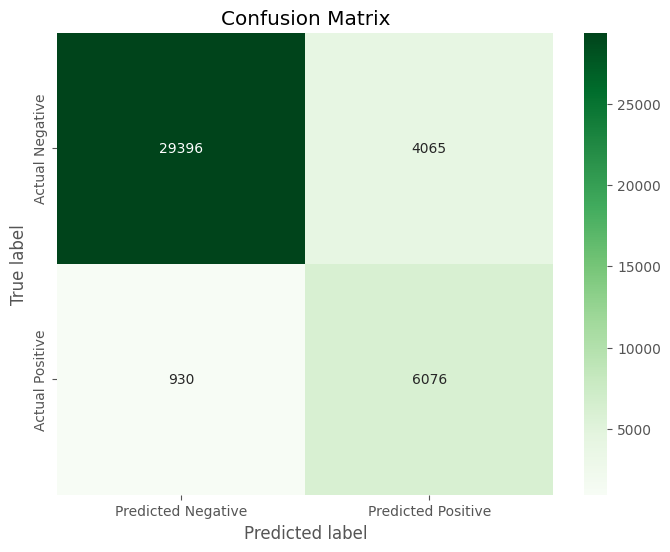

In [17]:
# Plot the confusion matrix
plot_confusion_matrix(val_y, lr_predictions)

#### Fine-tuned Polynomial Logistic Regression 

I will ultilize the grid-search and k-fold cross validation for the train data

In [18]:
# Create Polynomial Features and Scale them as there are still some outliers after transforming the data
poly = PolynomialFeatures(degree=2)
scaler = RobustScaler()

# Fit on training data
train_X_poly = poly.fit_transform(train_X)
train_X_poly_scaled = scaler.fit_transform(train_X_poly)

# Transform validation data
val_X_poly = poly.transform(val_X)
val_X_poly_scaled = scaler.transform(val_X_poly)

**Polynominal Logistic Regression with Lasso regularizaion (penalty = 'l1')**

In [19]:
results = []

best_auc = 0
best_f1 = 0
best_model = None

# Establish lambda values to test (regularization grid)
C_values = np.logspace(-5, 1, num=25)  # C is the inverse of lambda

for C in C_values:
    fold_auc = []
    fold_f1_macro = []
        # Initialize lists to hold the AUC and F1 scores for the current C
    
    for train_index, test_index in kf.split(train_X_poly_scaled):
        X_train, X_test = train_X_poly_scaled[train_index], train_X_poly_scaled[test_index]
        y_train, y_test = train_y.iloc[train_index], train_y.iloc[test_index]
        
        clf = LogisticRegression(penalty='l1', C=C, solver='liblinear', max_iter=1000, class_weight='balanced', random_state=0)
        clf.fit(X_train, y_train)
        
        y_pred = clf.predict(X_test)
        y_proba = clf.predict_proba(X_test)[:, 1]
        
        auc = roc_auc_score(y_test, y_proba)
        f1_macro = f1_score(y_test, y_pred, average='macro')
        
        fold_auc.append(auc)
        fold_f1_macro.append(f1_macro)
    
    mean_auc = np.mean(fold_auc)
    mean_f1_macro = np.mean(fold_f1_macro)
    if mean_auc > best_auc:
        best_auc = mean_auc
        best_f1 = mean_f1_macro
        best_model = clf

# Print best model details
if best_model is not None:
    print("Best Model Selected:")
    print("  Best AUC:", best_auc)
    print("  Best F1 (Macro):", best_f1)
    print("  Coefficients:", best_model.coef_)
    print("  Intercept:", best_model.intercept_)
    print("  C (Inverse of Lambda):", best_model.get_params()['C'])
    print("  Penalty:", best_model.get_params()['penalty'])
    print("  Solver:", best_model.get_params()['solver'])
    print("  Max Iterations:", best_model.get_params()['max_iter'])
else:
    print("No model was selected as best.")



Best Model Selected:
  Best AUC: 0.9541227873930709
  Best F1 (Macro): 0.8449900134651068
  Coefficients: [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.94519123e-03
   0.00000000e+00  3.05509830e-01  0.00000000e+00  0.00000000e+00
  -6.99430044e-03  0.00000000e+00  5.37371336e-02  0.00000000e+00
   1.72466936e-02  4.43873037e-02  0.00000000e+00  2.97044580e-01
  -1.27899569e-01  1.81400139e+00  1.79580765e+00  4.81861987e-01
   0.00000000e+00  1.83474086e-01 -1.03713904e-01  0.00000000e+00
   0.00000000e+00  1.08581618e-02  1.09629048e-01  0.00000000e+00
   0.00000000e+00  1.44002696e-01 -3.01419160e-02 -2.25100006e-03
   0.00000000e+00  0.00000000e+00  3.01267328e-01  0.00000000e+00
   1.35742939e-02  8.32190442e-02  8.26109054e-02 -4.10060246e-02
   1.88672058e-03  1.70482690e-02  0.00000000e+00  0.00000000e+00
   1.36202100e-02 -7.21005219e-03 -9.96652319e-03  3.48844689e-02
  -2.61548514e-03  1.09158431e-03 -2.81283081e-02 -3.92472181e-02
   2.40464748e-01 -4.66587222e-02 -9

Validation Accuracy: 0.896
Validation AUC-ROC: 0.954
Validation F1-Score (Macro): 0.840
Validation Precision (Macro): 0.810
Validation Recall (Macro): 0.888


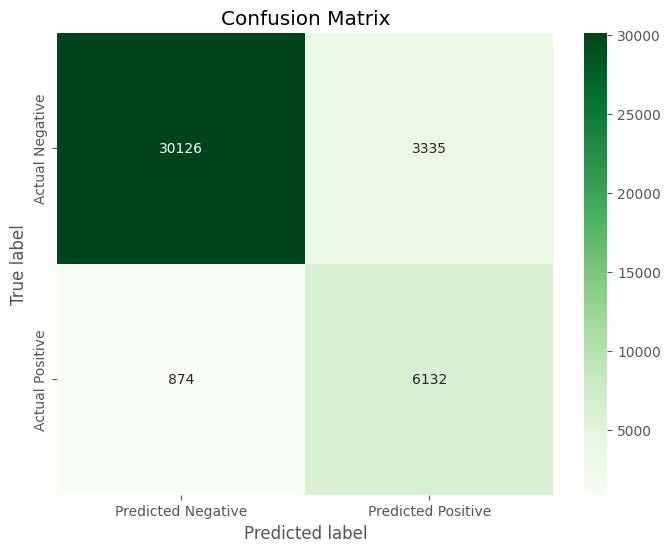

In [20]:
# Proceed to use best_model to predict on validation data if available
val_predictions = best_model.predict(val_X_poly_scaled)
val_probabilities = best_model.predict_proba(val_X_poly_scaled)[:, 1]

# Use the functions for displaying metrics and plotting confusion matrix
display_metrics(val_y, val_predictions, val_probabilities)
plot_confusion_matrix(val_y, val_predictions)

As you can see, the train's f1 scores are slightly decreased from 0.844 to 0.841, it is acceptable and it is more generalized.

**Polynominal Logistic Regression with Ridge regularizaion (penalty = 'l2')**

In [21]:
results = []

best_auc = 0
best_f1 = 0
best_model = None

# Establish lambda values to test (regularization grid)
C_values = np.logspace(-5, 1, num=25)  # C is the inverse of lambda

for C in C_values:
    fold_auc = []
    fold_f1_macro = []
    
    for train_index, test_index in kf.split(train_X_poly_scaled):
        X_train, X_test = train_X_poly_scaled[train_index], train_X_poly_scaled[test_index]
        y_train, y_test = train_y.iloc[train_index], train_y.iloc[test_index]
        
        clf = LogisticRegression(penalty='l2', C=C, solver='liblinear', max_iter=1000, class_weight='balanced', random_state=0)
        clf.fit(X_train, y_train)
        
        y_pred = clf.predict(X_test)
        y_proba = clf.predict_proba(X_test)[:, 1]
        
        auc = roc_auc_score(y_test, y_proba)
        f1_macro = f1_score(y_test, y_pred, average='macro')
        
        fold_auc.append(auc)
        fold_f1_macro.append(f1_macro)
    
    mean_auc = np.mean(fold_auc)
    mean_f1_macro = np.mean(fold_f1_macro)
    if mean_auc > best_auc:
        best_auc = mean_auc
        best_f1 = mean_f1_macro
        best_model = clf

# Print best model details
if best_model is not None:
    print("Best Model Selected:")
    print("  Best AUC:", best_auc)
    print("  Best F1 (Macro):", best_f1)
    print("  Coefficients:", best_model.coef_)
    print("  Intercept:", best_model.intercept_)
    print("  C (Inverse of Lambda):", best_model.get_params()['C'])
    print("  Penalty:", best_model.get_params()['penalty'])
    print("  Solver:", best_model.get_params()['solver'])
    print("  Max Iterations:", best_model.get_params()['max_iter'])
else:
    print("No model was selected as best.")


Best Model Selected:
  Best AUC: 0.9540340393046927
  Best F1 (Macro): 0.8442678912975776
  Coefficients: [[ 0.00000000e+00  2.92156363e-01 -1.89517106e-01 -1.14596451e-01
   7.80578883e-02  6.10781314e-01  2.32659636e-01  3.10777898e-03
  -3.50740712e-02 -8.11696091e-02 -8.72934818e-03  1.08810467e-03
   3.02321464e-02  2.99580302e-01 -1.92250910e-01  5.51271511e-01
  -7.63540425e-02  1.95573989e+00  1.98266750e+00  5.43447999e-01
   2.92156363e-01  3.54053505e-01 -2.22944740e-01  1.10410806e-01
  -1.80621620e-01 -1.03668091e-01  2.52647772e-01 -1.67390497e-01
  -7.84507002e-02  1.79118629e-01 -3.59967437e-02 -3.03497166e-02
  -1.64873087e-01  1.23679315e-01  1.44176391e-01 -2.10787211e-02
  -5.38044940e-02  1.43998825e-02  8.82598703e-02 -3.96493066e-02
   2.69818603e-03  4.21855105e-02 -4.20011688e-02  2.13313992e-03
   1.36084465e-02 -7.01117260e-03 -6.97746305e-02  3.68974516e-02
  -2.41847853e-03  4.71974886e-03 -6.19519416e-02 -4.82340736e-02
   2.63191296e-01 -5.01331835e-02 -9

Validation Accuracy: 0.896
Validation AUC-ROC: 0.954
Validation F1-Score (Macro): 0.840
Validation Precision (Macro): 0.810
Validation Recall (Macro): 0.888


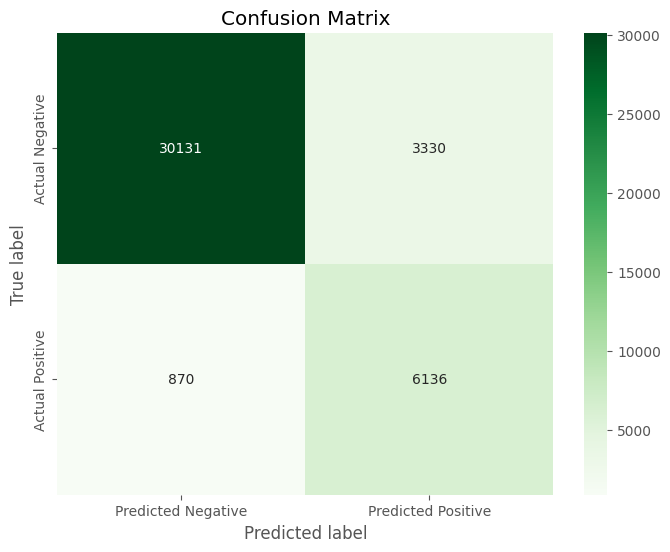

In [22]:
# Proceed to use best_model to predict on validation data if available

val_predictions = best_model.predict(val_X_poly_scaled)
val_probabilities = best_model.predict_proba(val_X_poly_scaled)[:, 1]

# Use the functions for displaying metrics and plotting confusion matrix
display_metrics(val_y, val_predictions, val_probabilities)
plot_confusion_matrix(val_y, val_predictions)

### 3.4.2. Decision Tree:


#### Prepare data

In [23]:
# Assign train and validation set used for training Decision Tree models
train_X_dt = train_X
train_y_dt = train_y

val_X_dt = val_X
val_y_dt = val_y

#### Baseline model

In [24]:
# Decision Tree Baseline model with balanced class_weight for imbalance dataset as mention in the EDA
dt = DecisionTreeClassifier(class_weight="balanced")

# Fitting the model
dt.fit(train_X_dt, train_y_dt)

# Make predictions on the validation set
dt_predictions = dt.predict(val_X_dt)
dt_probabilities = dt.predict_proba(val_X_dt)[:, 1]  # Probability estimates for the positive class


In [25]:
# Calculate and print the metrics
accuracy = accuracy_score(val_y_dt, dt_predictions)
auc_roc = roc_auc_score(val_y_dt, dt_probabilities)
f1 = f1_score(val_y_dt, dt_predictions, average='macro')

# Print metrics on prediction 
print("Accuracy:", accuracy)
print("AUC-ROC:", auc_roc)
print("F1 Score (Macro):", f1)
print(classification_report(val_y_dt, dt_predictions))


Accuracy: 0.9369362690587392
AUC-ROC: 0.8916738130755383
F1 Score (Macro): 0.8902640215420617
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     33461
           1       0.81      0.82      0.82      7006

    accuracy                           0.94     40467
   macro avg       0.89      0.89      0.89     40467
weighted avg       0.94      0.94      0.94     40467



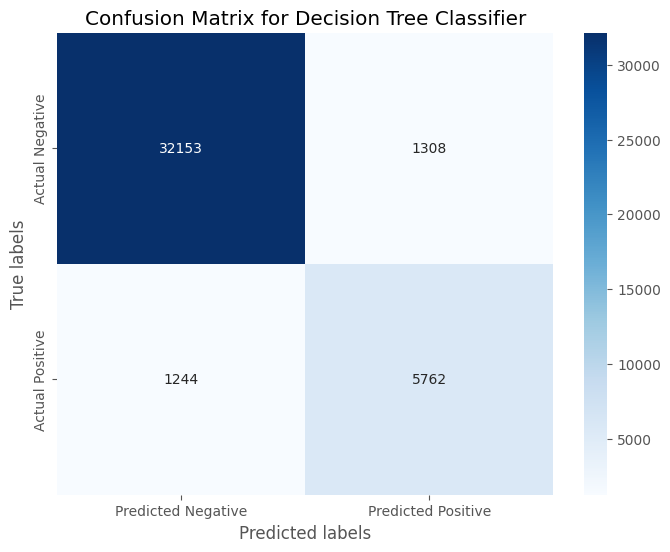

In [26]:

# Plot the confusion matrix
cm = confusion_matrix(val_y_dt, dt_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

#### Fine-tuned Model

In [29]:
param_grid_dtree = {
    'max_depth':np.arange(2,500, 50), 
    'min_samples_split':np.arange(2,50,5),
    'min_samples_leaf': np.arange(1, 20, 3),
    'criterion': ["gini", "entropy"],
}

fine_tuned_dtree = tree.DecisionTreeClassifier(class_weight='balanced')

# Perform grid search
# grid_search_dtree = GridSearchCV(fine_tuned_dtree, param_grid_dtree, scoring='f1_macro', cv=5, n_jobs=-1, verbose=1)
grid_search_dtree = GridSearchCV(fine_tuned_dtree, param_grid_dtree, scoring='f1_macro', cv=5)

# Fit the grid search to the data
grid_search_dtree.fit(train_X_dt, train_y_dt)

# Best parameters and scores for the fine-tuned model
print("Fine-tuned Decision Tree Best Parameters: ", grid_search_dtree.best_params_)
print("Fine-tuned Decision Tree Best Mean F1 Score: ", grid_search_dtree.best_score_)

# Retrieve the best fine-tuned model
best_dtree_model = grid_search_dtree.best_estimator_


Fine-tuned Decision Tree Best Parameters:  {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
Fine-tuned Decision Tree Best Mean F1 Score:  0.8946476922640955


In [30]:
pd.DataFrame(grid_search_dtree.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.118225,0.014145,0.014767,0.000978,gini,2,1,2,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.866124,0.869254,0.863351,0.864004,0.866195,0.865786,0.002069,1267
1,0.111612,0.002192,0.014361,0.000489,gini,2,1,7,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.866124,0.869254,0.863351,0.864004,0.866195,0.865786,0.002069,1267
2,0.106768,0.001716,0.013970,0.000011,gini,2,1,12,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.866124,0.869254,0.863351,0.864004,0.866195,0.865786,0.002069,1267
3,0.105517,0.001933,0.013563,0.000477,gini,2,1,17,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.866124,0.869254,0.863351,0.864004,0.866195,0.865786,0.002069,1267
4,0.110633,0.002650,0.015548,0.001737,gini,2,1,22,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.866124,0.869254,0.863351,0.864004,0.866195,0.865786,0.002069,1267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,0.380090,0.009878,0.015757,0.000399,entropy,452,19,27,"{'criterion': 'entropy', 'max_depth': 452, 'mi...",0.871517,0.877195,0.869918,0.868027,0.867197,0.870771,0.003546,506
1396,0.399155,0.016964,0.016561,0.000483,entropy,452,19,32,"{'criterion': 'entropy', 'max_depth': 452, 'mi...",0.871791,0.877237,0.869508,0.867646,0.867222,0.870681,0.003654,546
1397,0.385388,0.006998,0.016556,0.001197,entropy,452,19,37,"{'criterion': 'entropy', 'max_depth': 452, 'mi...",0.871573,0.876810,0.869767,0.867514,0.867278,0.870588,0.003486,623
1398,0.386983,0.005590,0.015758,0.000399,entropy,452,19,42,"{'criterion': 'entropy', 'max_depth': 452, 'mi...",0.871621,0.876283,0.869437,0.868338,0.868658,0.870867,0.002940,468


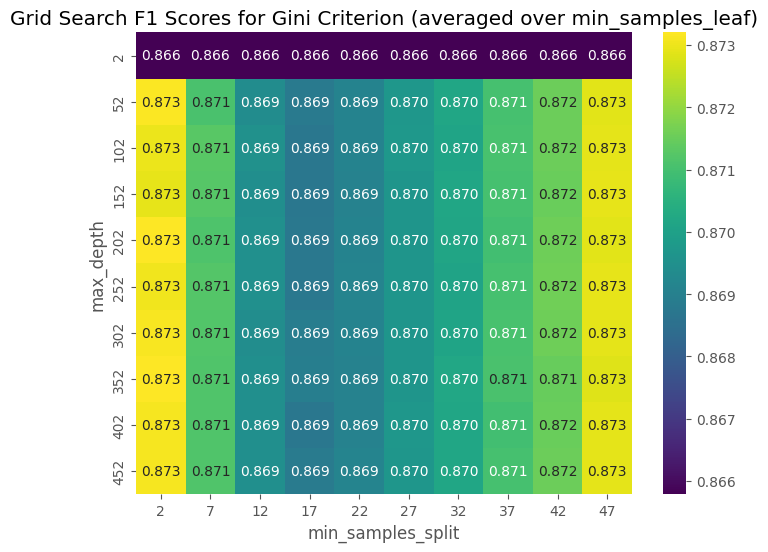

In [31]:
# Extract the scores for visualization
results = pd.DataFrame(grid_search_dtree.cv_results_)

# Filter the results for one criterion to simplify
results_gini = results[results['param_criterion'] == 'gini']

# Let's average over 'min_samples_leaf'
mean_scores = results_gini.groupby(['param_max_depth', 'param_min_samples_split']).mean_test_score.mean().unstack()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(mean_scores, annot=True, fmt=".3f", cmap='viridis')
plt.xlabel('min_samples_split')
plt.ylabel('max_depth')
plt.title('Grid Search F1 Scores for Gini Criterion (averaged over min_samples_leaf)')
plt.show()

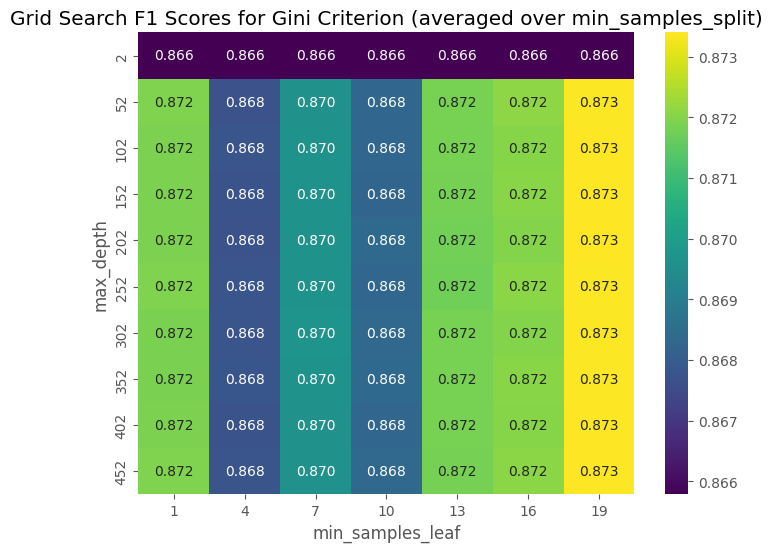

In [32]:
# Extract the scores for visualization
results = pd.DataFrame(grid_search_dtree.cv_results_)

# Filter the results for one criterion to simplify
results_gini = results[results['param_criterion'] == 'gini']

# Let's average over 'min_samples_split'
mean_scores = results_gini.groupby(['param_max_depth', 'param_min_samples_leaf']).mean_test_score.mean().unstack()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(mean_scores, annot=True, fmt=".3f", cmap='viridis')
plt.xlabel('min_samples_leaf')
plt.ylabel('max_depth')
plt.title('Grid Search F1 Scores for Gini Criterion (averaged over min_samples_split)')
plt.show()

In [33]:
# Calculate F1 scores on the training and validation sets
train_f1_score = f1_score(train_y_dt, best_dtree_model.predict(train_X_dt), average='macro')
val_f1_score = f1_score(val_y_dt, best_dtree_model.predict(val_X_dt), average='macro')

# Print the F1 scores
print("Training F1 Score (Macro):", train_f1_score)
print("Validation F1 Score (Macro):", val_f1_score)

Training F1 Score (Macro): 0.8655369182497042
Validation F1 Score (Macro): 0.8631491856593652


Validation Accuracy: 0.918
Validation AUC-ROC: 0.918
Validation F1-Score (Macro): 0.863
Validation Precision (Macro): 0.850
Validation Recall (Macro): 0.879


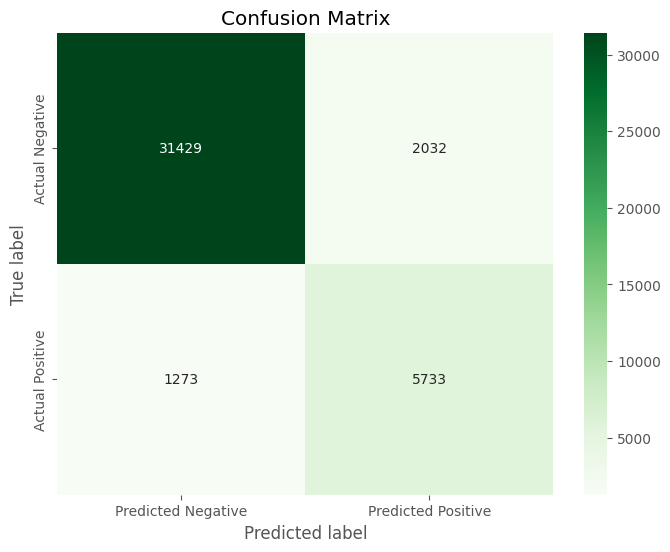

In [34]:
# Proceed to use best_model to predict on validation data if available

val_predictions = best_dtree_model.predict(val_X_dt)
val_probabilities = best_dtree_model.predict_proba(val_X_dt)[:, 1]

# Use the functions for displaying metrics and plotting confusion matrix
display_metrics(val_y_dt, val_predictions, val_probabilities)
plot_confusion_matrix(val_y_dt, val_predictions)

#### Post pruning decision trees with cost complexity pruning

In [35]:
post_pruned_dtree = tree.DecisionTreeClassifier(class_weight='balanced')
path = post_pruned_dtree.cost_complexity_pruning_path(train_X_dt, train_y_dt)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [36]:
clfs = []
for ccp_alpha in ccp_alphas:
    post_pruned_dtree = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha, class_weight='balanced')
    post_pruned_dtree.fit(train_X_dt, train_y_dt)
    clfs.append(post_pruned_dtree)

Best ccp_alpha from manual pruning: 0.0003010516513471534
Validation Accuracy: 0.940
Validation AUC-ROC: 0.979
Validation F1-Score (Macro): 0.899
Validation Precision (Macro): 0.882
Validation Recall (Macro): 0.920


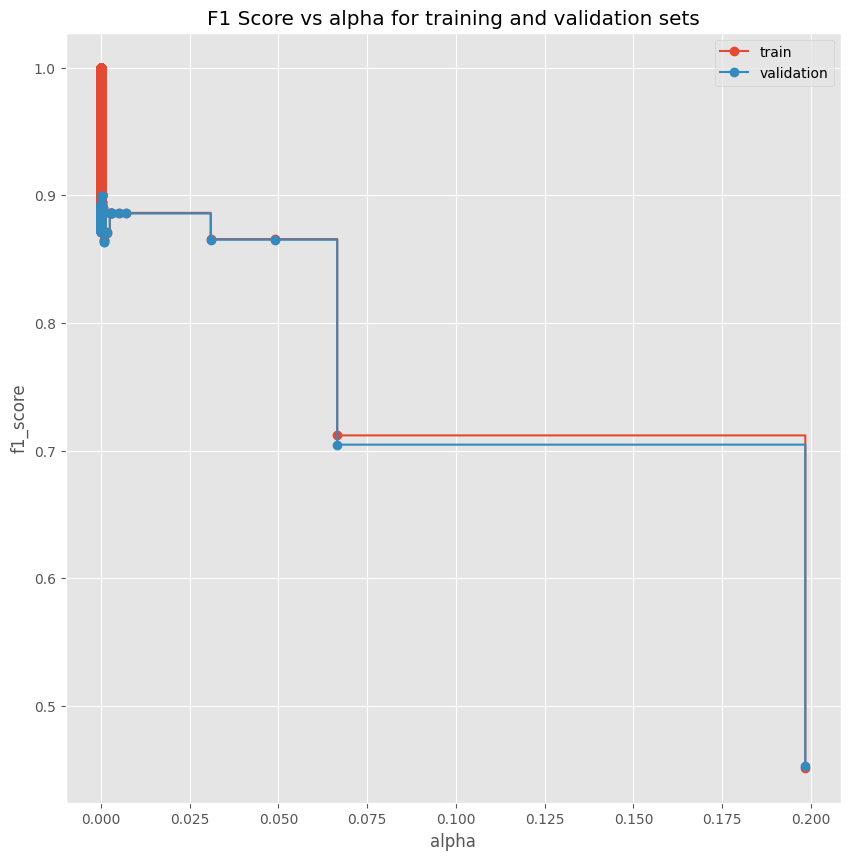

In [37]:
train_scores = [f1_score(train_y_dt, post_pruned_dtree.predict(train_X_dt), average='macro') for post_pruned_dtree in clfs]
val_scores = [f1_score(val_y_dt, post_pruned_dtree.predict(val_X_dt), average='macro') for post_pruned_dtree in clfs]

# Find the best classifier
best_post_pruned_dtree_index = val_scores.index(max(val_scores))
best_post_pruned_dtree = clfs[best_post_pruned_dtree_index]

# Now you can use display_metrics function to print out the metrics
print("Best ccp_alpha from manual pruning:", ccp_alphas[best_post_pruned_dtree_index])
display_metrics(val_y, best_post_pruned_dtree.predict(val_X_dt), best_post_pruned_dtree.predict_proba(val_X_dt)[:, 1])

# Plotting
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlabel("alpha")
ax.set_ylabel("f1_score")
ax.set_title("F1 Score vs alpha for training and validation sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, val_scores, marker='o', label="validation", drawstyle="steps-post")
ax.legend()
plt.show()

In [38]:
# Fitting the model
best_post_pruned_dtree.fit(train_X_dt, train_y_dt)

# Predictions on validation set
best_post_pruned_dtree_predictions = best_post_pruned_dtree.predict(val_X_dt)

Validation Accuracy: 0.940
Validation AUC-ROC: 0.979
Validation F1-Score (Macro): 0.899
Validation Precision (Macro): 0.882
Validation Recall (Macro): 0.920


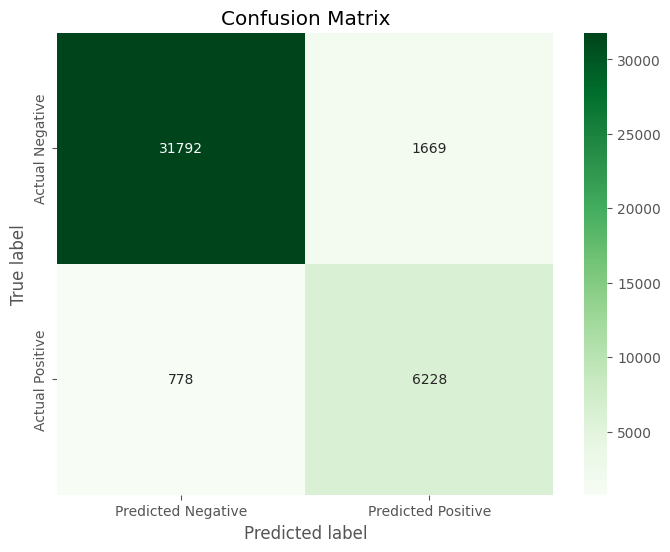

In [39]:
# Proceed to use best_model to predict on validation data if available

val_predictions = best_post_pruned_dtree.predict(val_X_dt)
val_probabilities = best_post_pruned_dtree.predict_proba(val_X_dt)[:, 1]

# Use the functions for displaying metrics and plotting confusion matrix
display_metrics(val_y_dt, val_predictions, val_probabilities)
plot_confusion_matrix(val_y_dt, val_predictions)

### 3.4.3. Random Forest:


#### Prepare data

In [40]:
# Assign train and validation set used for training Random Forest models
train_X_rf = train_X
train_y_rf = train_y

val_X_rf = val_X
val_y_rf = val_y

#### Baseline Model

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.model_selection import cross_val_score, KFold


# Define the baseline Random Forest model
baseline_rf = RandomForestClassifier(max_depth=8, n_estimators=500, class_weight='balanced_subsample', random_state=0)

# Define the K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation to evaluate model performance using F1 score
baseline_rf_scores = cross_val_score(baseline_rf, train_X_rf, train_y_rf, cv=kf, scoring='f1_macro')

# Calculate the mean F1 score
baseline_rf_mean_score = np.mean(baseline_rf_scores)
print(f'Baseline Random Forest Mean F1 Score: {baseline_rf_mean_score}')

# Fit the model
baseline_rf.fit(train_X_rf, train_y_rf)


Baseline Random Forest Mean F1 Score: 0.9031805224916232


RandomForestClassifier(class_weight='balanced_subsample', max_depth=8,
                       n_estimators=500, random_state=0)

Validation Accuracy: 0.941
Validation AUC-ROC: 0.976
Validation F1-Score (Macro): 0.901
Validation Precision (Macro): 0.884
Validation Recall (Macro): 0.922


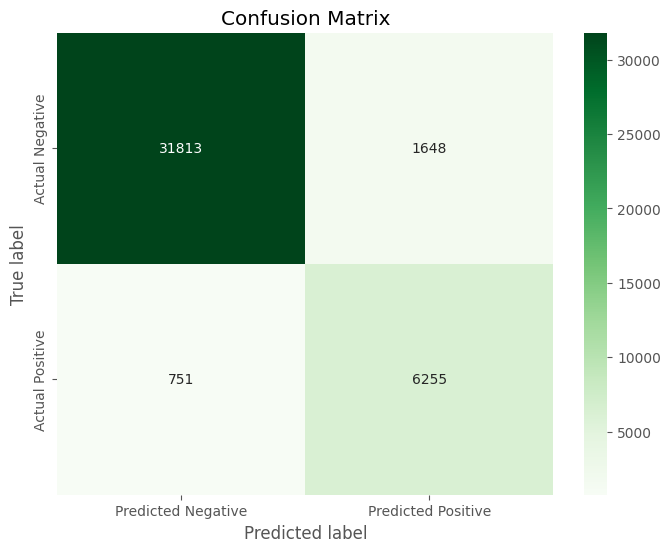

In [44]:
# Proceed to use best_model to predict on validation data if available

val_predictions = baseline_rf.predict(val_X_rf)
val_probabilities = baseline_rf.predict_proba(val_X_rf)[:, 1]

# Use the functions for displaying metrics and plotting confusion matrix
display_metrics(val_y_rf, val_predictions, val_probabilities)
plot_confusion_matrix(val_y_rf, val_predictions)

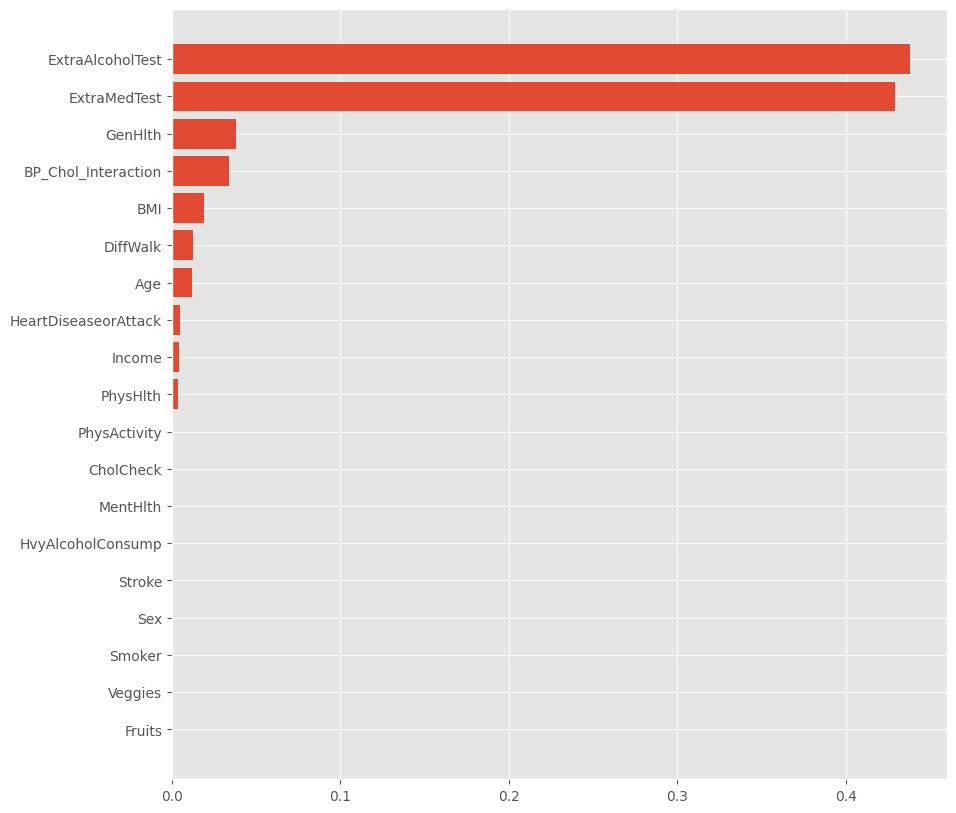

In [45]:
rf_feature_importances = baseline_rf.feature_importances_
sorted_idx = rf_feature_importances.argsort()

plt.figure(figsize=(10,10))
plt.barh(df_X.columns[sorted_idx], rf_feature_importances[sorted_idx])
plt.show()

#### Fine-tuned Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import f1_score, make_scorer

# Initialize RandomForestClassifier
ft_rf = RandomForestClassifier(class_weight='balanced', random_state=42)

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [10, 20, 30, None],  # Maximum depth of the tree
    'min_samples_split': np.arange(2,50,5),  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required at each leaf node
    'bootstrap': [True, False],        # Method for sampling data points (with or without replacement)
    'criterion': ["gini", "entropy"]
}

# Setup the scorers
scorers = {
    'f1_macro': make_scorer(f1_score, average='macro'),
    'roc_auc': 'roc_auc'
}

# Perform grid search
grid_rf = GridSearchCV(estimator=ft_rf, param_grid=param_grid, scoring=scorers, refit='f1_macro', cv=5, n_jobs=-1, verbose=1)
grid_rf.fit(train_X_rf, train_y_rf)

# Best parameter set found:
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validated F1 score (macro-average):", grid_search.best_score_)
best_roc_auc = grid_rf.cv_results_['mean_test_roc_auc'][grid_rf.best_index_]
print("Best cross-validated ROC-AUC:", best_roc_auc)

# Retrieve the best Random Forest model
best_rf_model = grid_search.best_estimator_


Fitting 5 folds for each of 1440 candidates, totalling 7200 fits


In [ ]:
# Convert grid search results to a DataFrame
results_df = pd.DataFrame(grid_rf.cv_results_)

# Pivot the data for easier plotting (example for n_estimators and max_depth)
pivot_f1 = results_df.pivot_table(values='mean_test_f1_macro', index='param_n_estimators', columns='param_max_depth')
pivot_auc = results_df.pivot_table(values='mean_test_roc_auc', index='param_n_estimators', columns='param_max_depth')

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# F1 Macro Score Heatmap
sns.heatmap(pivot_f1, annot=True, fmt=".3f", cmap="viridis", ax=ax1)
ax1.set_title('Grid Search F1 Scores')
ax1.set_xlabel('Max Depth')
ax1.set_ylabel('N-Estimators')

# ROC-AUC Score Heatmap
sns.heatmap(pivot_auc, annot=True, fmt=".3f", cmap="viridis", ax=ax2)
ax2.set_title('Grid Search ROC-AUC Scores')
ax2.set_xlabel('Max Depth')
ax2.set_ylabel('N-Estimators')

plt.show()

In [ ]:
# Proceed to use best_model to predict on validation data if available

val_predictions = best_rf_estimator.predict(val_X_rf)
val_probabilities = best_rf_estimator.predict_proba(val_X_rf)[:, 1]

# Use the functions for displaying metrics and plotting confusion matrix
display_metrics(val_y_rf, val_predictions, val_probabilities)
plot_confusion_matrix(val_y_rf, val_predictions)

In [ ]:
# Plot the importance of features toward our baseline random forest model
best_rf_estimator_feature_importances = best_rf_model.feature_importances_
sorted_idx = best_rf_estimator_feature_importances.argsort()

plt.figure(figsize=(10,10))
plt.barh(df_train.columns[sorted_idx], best_rf_estimator_feature_importances[sorted_idx])
plt.show()

# 4. Evaluation

### 4.1. Model comparison


y_true = test_labels  # This should be your actual test labels
predictions_baseline_logreg = model_baseline_logreg.predict(X_test)
predictions_finetuned_logreg = model_finetuned_logreg.predict(X_test)
predictions_baseline_dtree = model_baseline_dtree.predict(X_test)
predictions_finetuned_dtree = model_finetuned_dtree.predict(X_test)
predictions_baseline_rf = model_baseline_rf.predict(X_test)
predictions_finetuned_rf = model_finetuned_rf.predict(X_test)

# Calculate F1 scores
f1_scores = {
    'Logistic Regression Baseline': f1_score(y_true, predictions_baseline_logreg),
    'Logistic Regression Fine-tuned': f1_score(y_true, predictions_finetuned_logreg),
    'Decision Tree Baseline': f1_score(y_true, predictions_baseline_dtree),
    'Decision Tree Fine-tuned': f1_score(y_true, predictions_finetuned_dtree),
    'Random Forest Baseline': f1_score(y_true, predictions_baseline_rf),
    'Random Forest Fine-tuned': f1_score(y_true, predictions_finetuned_rf)
}

# Creating bar plot
plt.figure(figsize=(12, 6))
plt.bar(f1_scores.keys(), f1_scores.values(), color=['blue', 'lightblue', 'green', 'lightgreen', 'red', 'pink'])
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('Comparison of F1 Scores for Machine Learning Models')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

### 4.2. Observation and Analysis

### 4.3. Further research and Improvements

# 5. Prediction on Unseen Data

### 5.1. Load the data

In [ ]:
# Show the first 5 rows of testing dataset
df_test.head()

In [ ]:
# Show the first 5 rows of dataset
df_predictions.head()

### 5.2. Preprocess the data

In [ ]:
# Before employing the optimal model to predict the target variable, it is essential to preprocess the testing dataset
# First, drop the independent variables that are not used to trained
preprocessed_df_test = df_test.drop(dropped_variables, axis=1)

# The indentifier and NaN target should be also excluded
df_test_X = preprocessed_df_test.drop(['Status', "Id"], axis=1)

# Let the optimal (Fine-tuned Random Forest) model
df_test_y = best_rf_estimator.predict(df_test_X)

# print the array of predictions
df_test_y

### 5.3. Applying the model

In [ ]:
# Let the optimal (Fine-tuned Random Forest) model
df_test_y = best_rf_estimator.predict(df_test_X)

# print the array of predictions
df_test_y

# Insert the predictions into the predictions_df
df_predictions["Status"] = df_test_y

# View the dataframe again
df_predictions

### 5.4. Visualize the results

In [ ]:
# Plot the outputs
prediction_distribution = df_predictions["Status"].value_counts()

# Plotting the bar chart with counts displayed on top of each bar
ax = prediction_distribution.plot(kind='bar')
plt.title('Distribution of Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed

# Displaying counts on top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

### 5.5. Save the files

In [ ]:
# Save the prediction file for submission
# df_predictions.to_csv("/content/drive/MyDrive/RMIT/Sem A 2024/ML/ASM1/s3924942_predictions.csv", encoding="utf-8", index=False)